In [1]:
from sklearn.preprocessing import OneHotEncoder

In [2]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
              'c1': np.random.randn(10),
              'c2': ['a','a','a','a','a', 'b','b','b','b','b']
             })

In [3]:
bins = np.linspace(df.c1.min(), df.c1.max(), 5)
bins

df['c1bin'] =np.digitize(df['c1'], bins) #디지차이즈 함수: 영역으로 나눈 거를 가버림
df

,c1,c2,c1bin
0,0.429103,a,3
1,0.036613,a,3
2,0.791028,a,4
3,-0.572988,a,2
4,-0.462472,a,2
5,0.991980,b,5
6,-1.228784,b,1
7,-0.386742,b,2
8,0.361843,b,3
9,0.708643,b,4


In [4]:
print(df['c1bin'])
print('-'*50)
print(pd.get_dummies(df['c1bin'], prefix='c1'))

0    3
1    3
2    4
3    2
4    2
5    5
6    1
7    2
8    3
9    4
Name: c1bin, dtype: int64
--------------------------------------------------
   c1_1  c1_2  c1_3  c1_4  c1_5
0     0     0     1     0     0
1     0     0     1     0     0
2     0     0     0     1     0
3     0     1     0     0     0
4     0     1     0     0     0
5     0     0     0     0     1
6     1     0     0     0     0
7     0     1     0     0     0
8     0     0     1     0     0
9     0     0     0     1     0


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['columns'] = le.fit_transform(df['columns'])

KeyError: 'columns'

In [6]:
import pandas as pd
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')


In [7]:
train.shape #(891, 12)
test.shape #(418, 11)

(418, 11)

In [8]:
train.dtypes
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
objDF = train.select_dtypes(include=['object']).copy()

In [12]:
objDF.isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [13]:
any([False, False, False]) #False
any([False, True, False]) #False
#any함수는 어느 하나라도 True -> True
#all 함수는 모두 True -> True


True

In [14]:
objDF.isnull().any(axis=0)
objDF.isnull().any(axis=1)

objDF[objDF.isnull().any(axis=1)].shape # true인 것만 참조가 되서 나오는 거, 단 한개라도 널이 있는 거 출력
#확인을 하면, 결측값을 처리할 것이 많구나 라고 확인 할 수 있음


(689, 5)

In [15]:
objDF['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
A24            1
D21            1
E12            1
D45            1
F E69          1
Name: Cabin, Length: 147, dtype: int64

In [16]:
train['Sex'].value_counts()
# train[train['Sex']=='male']['Sex'] == 0
train.loc[train['Sex']=='male','Sex'] = 0

In [17]:
train.head()

train.loc[train['Sex']=='female','Sex'] = 1
test.loc[test['Sex']=='male','Sex'] = 0
test.loc[test['Sex']=='female','Sex'] = 1

In [18]:
train['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: object

In [19]:
train2 = pd.read_csv('titanic/train.csv')
test2 = pd.read_csv('titanic/test.csv')


In [20]:
train2['Sex'] = train2['Sex'].apply(lambda x:1 if x=='female' else 0)
test2['Sex'] = test2['Sex'].apply(lambda x:1 if x=='female' else 0)

In [21]:
train2.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [22]:
train3 = pd.read_csv('titanic/train.csv')
test3 = pd.read_csv('titanic/test.csv')

In [23]:
from sklearn.preprocessing import LabelEncoder
def gen(data):
    le=LabelEncoder()
    le.fit(['male', 'female'])
    data['Sex']=le.transform(data['Sex'])
    return data

train = gen(train)
test = gen(test)

ValueError: y contains previously unseen labels: 0

In [24]:
train3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [27]:
train['Embarked_C'] = train['Embarked'].apply(lambda x:True if x=='C' else False)
train['Embarked_S'] = train['Embarked'].apply(lambda x:True if x=='S' else False)
train['Embarked_Q'] = train['Embarked'].apply(lambda x:True if x=='Q' else False)

# train['Embarked_C'] = train3['Embarked'] == 'C'
# train3['Embarked_S'] = train3['Embarked'] == 'S'
# train3['Embarked_Q'] = train3['Embarked'] == 'Q'

In [28]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,False,True,False
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,False,True,False
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,False,True,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S,False,True,False
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,True,False,False


In [29]:
train4 = pd.read_csv('titanic/train.csv')
test4 = pd.read_csv('titanic/test.csv')

In [30]:
#범주형 칼럼을 원핫인코딩하기 Sex_0, Sex_1으로 바꾸기 
# train.Pclass -> Pclass_1 Pclass_2 Pclass_3
# Embarked -> Embarked_1, Embarked_2, Embarked_3


In [31]:
def myData(data, cols):
    # print(data[col])
    for col in cols:
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col)] ,axis=1)
        data = data.drop(col, axis = 1)
    return data

In [32]:
cols = ['Sex', 'Pclass', 'Embarked']
myData(train, cols)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_S,Embarked_Q,Sex_0,Sex_1,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,True,False,1,0,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,False,0,1,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,False,0,1,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,True,False,0,1,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,True,False,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,False,True,False,1,0,0,1,0,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,False,True,False,0,1,1,0,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,False,True,False,0,1,0,0,1,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,True,False,False,1,0,1,0,0,1,0,0


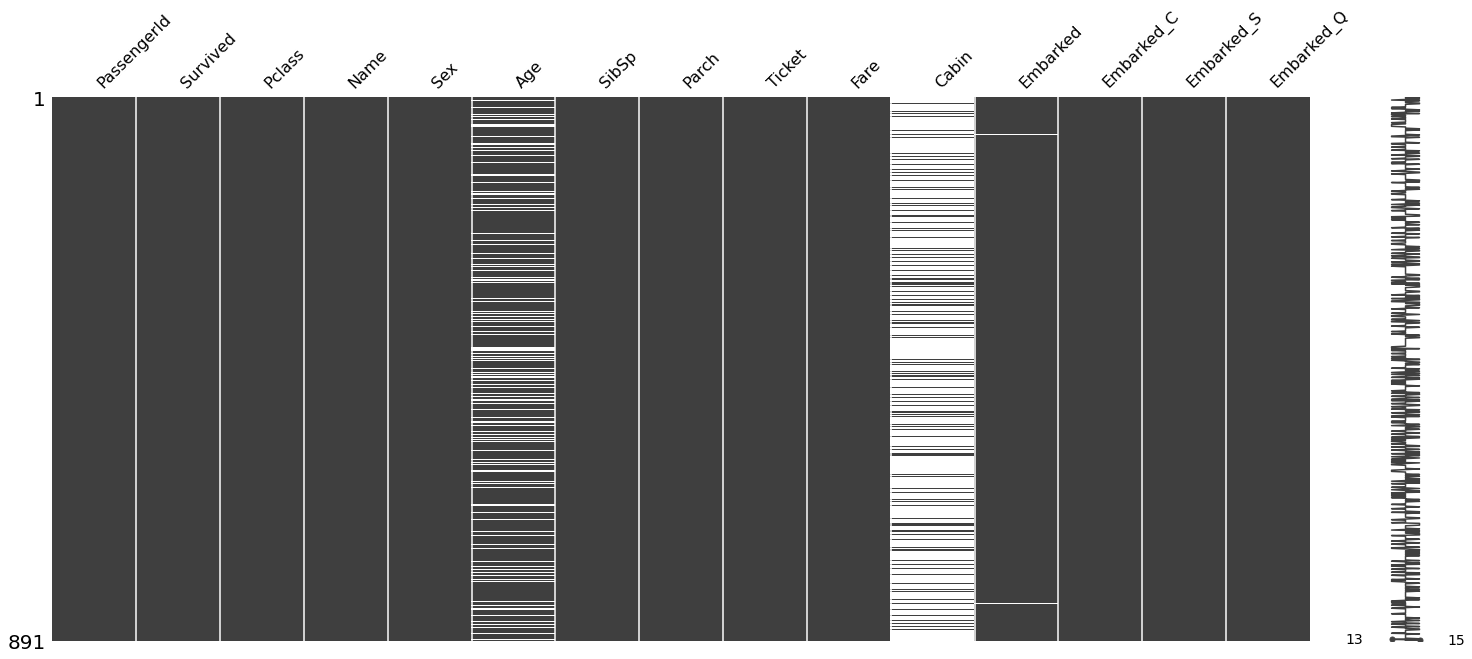

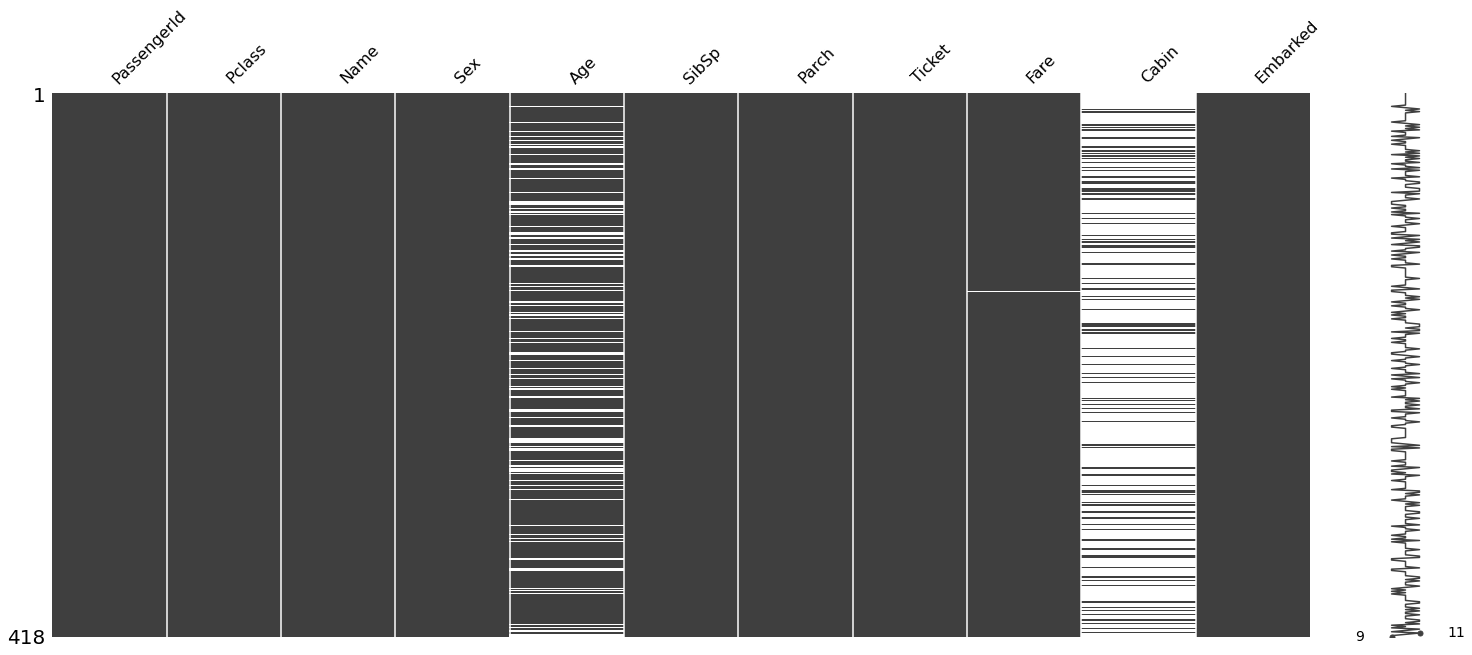

In [33]:
import missingno as msno

msno.matrix(train)
msno.matrix(test)


In [34]:
train['Age_mean'] = train['Age']

In [35]:
train['Age_mean'].isnull().sum()
train['Age_mean'].fillna(train['Age'].mean(), inplace = True)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Embarked_C       0
Embarked_S       0
Embarked_Q       0
Age_mean         0
dtype: int64

In [36]:
test['Age_mean'] = test['Age']
test['Age_mean'].fillna(test['Age'].mean(), inplace = True)


In [37]:
train['gender']=(train['Sex']=='female')
test['gender']=(test['Sex']=='female')


In [38]:
test['gender']

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: gender, Length: 418, dtype: bool

In [39]:
train['Embarked_S'] = train['Embarked'] == 'S'
train['Embarked_C'] = train['Embarked'] == 'C'
train['Embarked_Q'] = train['Embarked'] == 'Q'


In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q,Age_mean,gender
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True,False,22.0,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False,38.0,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,26.0,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,False,True,False,35.0,False
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,False,True,False,35.0,False


In [41]:
test['Embarked_S'] = test['Embarked'] == 'S'
test['Embarked_C'] = test['Embarked'] == 'C'
test['Embarked_Q'] = test['Embarked'] == 'Q'


In [42]:
train['FamilySize'] = train['SibSp']+train['Parch']+1

In [43]:
train['Family']=train['FamilySize']
train.loc[train['FamilySize'] == 1, 'Family'] ='S'
train.loc[(train['FamilySize'] > 1) & (train['FamilySize']<5), 'Family'] ='M'
train.loc[train['FamilySize']>5, 'Family'] ='L'


In [44]:

train['Family_S'] = train['Family'] == 'S'
train['Family_M'] = train['Family'] == 'M'
train['Family_L'] = train['Family'] == 'L'

In [45]:
test['FamilySize'] = test['SibSp']+test['Parch']+1
test['Family']=test['FamilySize']
test.loc[test['FamilySize'] == 1, 'Family'] ='S'
test.loc[(test['FamilySize'] > 1) & (test['FamilySize']<5), 'Family'] ='M'
test.loc[test['FamilySize']>5, 'Family'] ='L'

test['Family_S'] = test['Family'] == 'S'
test['Family_M'] = test['Family'] == 'M'
test['Family_L'] = test['Family'] == 'L'

In [46]:
train.Family.value_counts()

S    537
M    292
L     47
5     15
Name: Family, dtype: int64

In [47]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [48]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [49]:
train.Pclass = train.Pclass.astype('category')

In [50]:
train.Pclass.dtype

CategoricalDtype(categories=[1, 2, 3], ordered=False)

In [51]:
print(train.info())
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Embarked_C   891 non-null    bool    
 13  Embarked_S   891 non-null    bool    
 14  Embarked_Q   891 non-null    bool    
 15  Age_mean     891 non-null    float64 
 16  gender       891 non-null    bool    
 17  FamilySize   891 non-null    int64   
 18  Family       891 non-null    o

In [52]:
데이터 수집 -> 전처리 -> EDA(시각화, 기술통계 보기, 특성공학, 표준화/정규화, 결측값 처리, 상관계수 확인) -> 알고리즘(knn,kmean, svm, dt, nn, dnn, cnn, rnn) -> 모델링 -> 모델 평가 -> 모델 개선->완성된 모델 -> 예측

SyntaxError: invalid syntax (<ipython-input-52-2c25d3ac4294>, line 1)

In [53]:
train.columns
#모델링(입력데이터 -> 모델 -> 출력)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_C',
       'Embarked_S', 'Embarked_Q', 'Age_mean', 'gender', 'FamilySize',
       'Family', 'Family_S', 'Family_M', 'Family_L'],
      dtype='object')

In [54]:
#feature name을 저장하는 곳! fn
# 기준이 되는 항목 -> 입력데이터
# 노드가 많으면 시간이 오래걸림
# 어떤 변수를 선택햇을 때가 제일 좋은가를 봐야함, 엔트로피를 잘 설정해야함 
# 엔트로피 값을 계산하여 얼마나 잘 구분이 되는지 봐야함
# 엔트로피가 작은 것이 제일 분류가 잘된 거임
fn = ['gender','Age_mean', 'Embarked_C', 'Embarked_S', 'Embarked_Q', 'Family_S', 'Family_M', 'Family_L']
xTrain = train[fn]
xTrain.head()
yLabel = train['Survived']

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
model = DecisionTreeClassifier(max_depth = 3, random_state = 2020)
model

DecisionTreeClassifier(max_depth=3, random_state=2020)

In [57]:
#모델링
model.fit(xTrain, yLabel)

DecisionTreeClassifier(max_depth=3, random_state=2020)

In [58]:
from sklearn.model_selection import KFold, cross_val_score
# 교차 검증 : 아직 본 적 없는 데이터에 대해서 성능을 예측
# 더 좋은 모델을 위한 파라미터 튜닝을 위해 

In [59]:
# n_splits= 몇 겹으로 나눌껀지
# 전체 데이터를 10겹으로 분리, 9겹은 트레이닝 1겹:테스트

kfold = KFold(n_splits=10, shuffle= True, random_state = 2020)

In [60]:
kfold

KFold(n_splits=10, random_state=2020, shuffle=True)

In [61]:
score = cross_val_score(model, xTrain, yLabel, cv = kfold, n_jobs=-1, scoring='accuracy')


In [62]:
import numpy as np
print(score)
round(np.mean(score)*100, 2)

[0.67777778 0.53932584 0.60674157 0.66292135 0.60674157 0.68539326
 0.65168539 0.53932584 0.68539326 0.6741573 ]


63.29

In [63]:
xTest = test[fn]
xTest

,gender,Age_mean,Embarked_C,Embarked_S,Embarked_Q,Family_S,Family_M,Family_L
0,False,34.50000,False,False,True,True,False,False
1,False,47.00000,False,True,False,False,True,False
2,False,62.00000,False,False,True,True,False,False
3,False,27.00000,False,True,False,True,False,False
4,False,22.00000,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...
413,False,30.27259,False,True,False,True,False,False
414,False,39.00000,True,False,False,True,False,False
415,False,38.50000,False,True,False,True,False,False
416,False,30.27259,False,True,False,True,False,False


In [64]:
prediction = model.predict(xTest)
prediction.shape
prediction
test['Survived'] = prediction

In [65]:
res = test[['Passengerid', 'Survived']]
res
res.to_csv('titanic_res.csv', index = False)

KeyError: "['Passengerid'] not in index"